(50, 2)
6.0797930786240135
14.695098638237107
14.392709039089977
15.927685480096459
16.503052970382765
22.324440263570683
17.683925279707438
17.942046748239328
20.705047873012823
16.845767244030792
[2, 3, 5, 9, 13, 17, 19, 24, 25, 26, 27, 28, 29, 30, 33, 34, 35, 37, 40, 42, 43, 48]
x =  -2.649022230452916
y =  -6.2245027123066725
r =  16.845767244030792


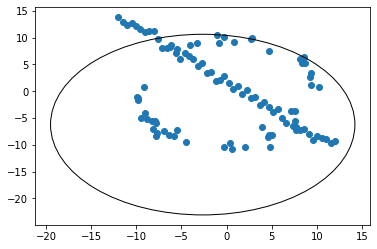

In [144]:
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import random
import matplotlib.pyplot as plt
# np . random . seed ( 0 )
N = 100

half_n = N//2
r = 10
s = r /16
t = np.random.uniform(0 , 2*np.pi , half_n)
n = s*np.random.randn (half_n)

x , y = (r+n)*np.cos(t) , (r+n)*np.sin(t)
X_circ = np.hstack ((x.reshape(half_n , 1) , y.reshape(half_n , 1)))

m, b = -1, 2
x = np.linspace (-12, 12 , half_n )
y = m*x + b + s*np.random.randn(half_n)
X_line = np . hstack (( x.reshape (half_n , 1) , y.reshape(half_n , 1)))

X = np.vstack((X_circ , X_line))
print(np.shape(X_circ))

plt.figure(1)
plt.scatter(X[:,0],X[:,1])


#n = np.shape(X)[0]

def random_sample(list):
    sample_list = []
    rand_nums = random.sample(range(1, len(list)), 3)
    for i in rand_nums:
        sample_list.append((list[i][0], list[i][1]))
    return sample_list

def model(sample):
	
    p1 = sample[0]
    p2 = sample[1]
    p3 = sample[2]

    # A = np.array([[pt2[0] - pt1[0], pt2[1] - pt1[1]], [pt3[0] - pt2[0], pt3[1] - pt2[1]]]) 
    # B = np.array([[pt2[0]**2 - pt1[0]**2 + pt2[1]**2 - pt1[1]**2], [pt3[0]**2 - pt2[0]**2 + pt3[1]**2 - pt2[1]**2]])		
    # inv_A = np.linalg.pinv(A)

    # c_x, c_y = np.dot(inv_A, B) / 2
    # c_x, c_y = c_x[0], c_y[0]
    # r = np.sqrt((c_x - pt1[0])**2 + (c_y - pt1[1])**2)

    # return c_x, c_y, r
    temp = p2[0] * p2[0] + p2[1] * p2[1]
    bc = (p1[0] * p1[0] + p1[1] * p1[1] - temp) / 2
    cd = (temp - p3[0] * p3[0] - p3[1] * p3[1]) / 2
    det = (p1[0] - p2[0]) * (p2[1] - p3[1]) - (p2[0] - p3[0]) * (p1[1] - p2[1])

    if abs(det) < 1.0e-6:
        return (None, np.inf)

    # Center of circle
    c_x = (bc*(p2[1] - p3[1]) - cd*(p1[1] - p2[1])) / det
    c_y = ((p1[0] - p2[0]) * cd - (p2[0] - p3[0]) * bc) / det

    r = np.sqrt((c_x - p1[0])**2 + (c_y - p1[1])**2)
    
    return c_x, c_y, r

def inliers(x_data, y_data, c_x, c_y, r):
    inliers = []
    d = r//2

    for i in range(len(x_data)):
        dis = np.sqrt((x_data[i]-c_x)**2 + (y_data[i]-c_y)**2)
        if dis < d:
            inliers.append(i)

    return inliers

max_inliers = []
x_data = X_circ[:,0]
y_data = X_circ[:,1]
radius = 0
center_x = 0
center_y = 0
for i in range(0,1000):
    sample_list = random_sample(X_circ)
    c_x, c_y, r = model(sample_list)
   
    inlier_list = inliers(x_data, y_data, c_x, c_y, r)
    if len(inlier_list)>len(max_inliers):
        print(r)
        max_inliers = inlier_list
        radius = r
        center_x = c_x
        center_y = c_y
print(max_inliers)
print("x = " ,center_x)
print("y = " ,center_y)
print("r = " ,radius)
circle = plt.Circle(( center_x , center_y ), radius, fill=False )
fig = plt.gcf()
ax = fig.gca() 
ax.add_patch(circle)      